<a href="https://colab.research.google.com/github/jlopez1288/Predictive_Analytics101/blob/main/Titanic_Analysis_Test_Data_Jennlopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [1]:
#Determining the survival of passengers of the Titanic

#Task 2a: Install the Needed Libraries

In [2]:
#no new libraries needed to be installed

#Task 2b: Import the Needed Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

#Task 3: Load the Data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_test.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [5]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Showing the first 5 rows of the dataset

##Get Data Info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#data showing the count alongs with non-null and datatypes

In [9]:
data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [10]:
#simpler way to view the numbers on passengers

##Find Missing Values

In [11]:
data.isnull().values.any()

True

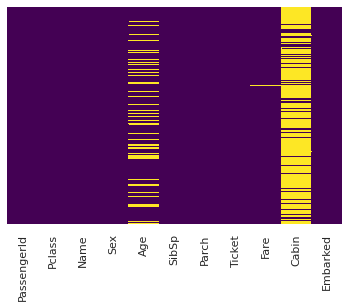

In [12]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#Task 5: Perform Data Cleaning

In [13]:
#dropping Cabin since is irrelevant

In [14]:
data.drop('Cabin', axis=1, inplace=True)

In [28]:
#check the data after dropping "Cabin"

In [15]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
#The column cabin no longer shows in dataset

#Task 6: Visualize Cleaned up Dataset

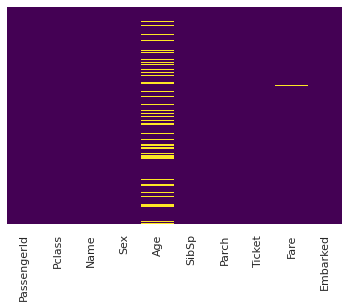

In [17]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [30]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
#Age has missing values.Theree are any value for NAN or inf , we have to fill it and then impute age, and We have to convert age that is in float > to int 

In [19]:
data['Age'] =  data['Age'].fillna(np.average)

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [67]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [70]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [72]:
#age column has no missing values now

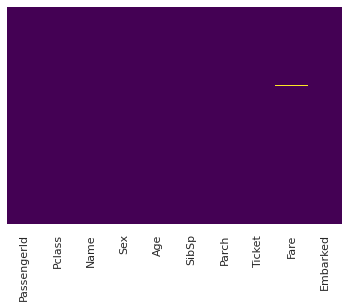

In [71]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [23]:
#Age column has been cleaned and imputed

In [24]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [32]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
#About 266 males compared to 152 female passengers

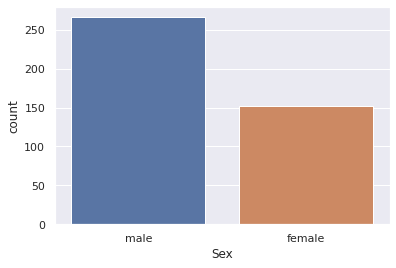

In [33]:
from dataclasses import dataclass
sns.countplot(x="Sex", data= data);

In [ ]:
#VIZ shows more male than female during trip

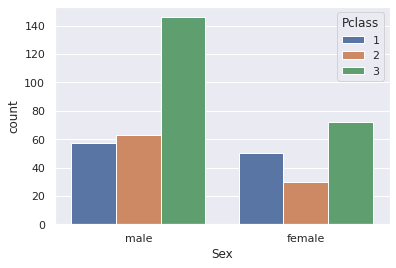

In [36]:
from dataclasses import dataclass
sns.countplot(x="Sex", hue= 'Pclass',data= data);

In [ ]:
#this viz shows that 3rd class had the most passengers and male were the majority of them

In [ ]:
#Age distribution 

In [66]:
sns.displot(data['Age'].count(str));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().



ValueError: ignored

In [25]:
# Trying to convert single column "age" to int dtype.

In [26]:
data['Age'].value_counts()

<function average at 0x7f20251f17a0>    86
24.0                                    17
21.0                                    17
22.0                                    16
30.0                                    15
                                        ..
76.0                                     1
28.5                                     1
22.5                                     1
62.0                                     1
38.5                                     1
Name: Age, Length: 80, dtype: int64

In [58]:
data['Age'].astype('int')


TypeError: ignored

In [46]:
data = data.astype({'Age':'int'})
print(data.dtypes)

TypeError: ignored

In [49]:
data['Age'].value_counts().sum()

418

In [50]:
#tried to convert "Age" column from float to integer. Did not work

In [51]:
#Assigning Sex , Male= 0 and Female 1 using OneHotEncoder

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Categorical data to be converted to numeric data
Sex = (["Male= 0", "Female= 1",])

### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Sex)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[1 0]
[[0. 1.]
 [1. 0.]]


In [53]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [57]:
data[data['Sex'].str.match("female")].count()

PassengerId    152
Pclass         152
Name           152
Sex            152
Age            152
SibSp          152
Parch          152
Ticket         152
Fare           152
Embarked       152
dtype: int64

In [56]:
data[data['Sex'].str.match("male")].count()

PassengerId    266
Pclass         266
Name           266
Sex            266
Age            266
SibSp          266
Parch          266
Ticket         266
Fare           265
Embarked       266
dtype: int64

In [55]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [54]:
#Sex was not changed to 0 & 1

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    object 
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


In [ ]:
#lets try to replace "sex" &"Emabrked" with a dummie variable since they are in object  format

In [77]:
Sex =pd.get_dummies(data['Sex'], drop_first=True)
Embarked =pd.get_dummies(data['Embarked'], drop_first=True) #important

In [78]:
data['Embarked'].head()

0    Q
1    S
2    Q
3    S
4    S
Name: Embarked, dtype: object

In [79]:
Embarked

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [80]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [81]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [82]:
data.drop(['PassengerId', 'Embarked'], axis= 1, inplace=True)

In [91]:
data2 = pd.concat([ data, Embarked, PassengerId], axis=1)

NameError: ignored

#Task 7: Conceptualize the problem

In [ ]:
???

#Task 8: Perform Data-Split

In [111]:
# split into train and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [112]:
y= data ['Sex']
x= data.drop ('Sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

#Task 9: Choose the ML Method to follow

In [113]:
# Building the first model with all the features
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: ignored

#Task 10: Train the ML Model

In [114]:
predictions = logmodel.predict(X_test)

ValueError: ignored

In [115]:
from sklearn.metrics import classification_report

#Task 11: Test the Model

In [116]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Female", sum(pp!=0))
print("Male", sum(pp==0))

ValueError: ignored

In [117]:
#Got really frustrated with this dataset. Can we please go over in a 1 on 1. thanks